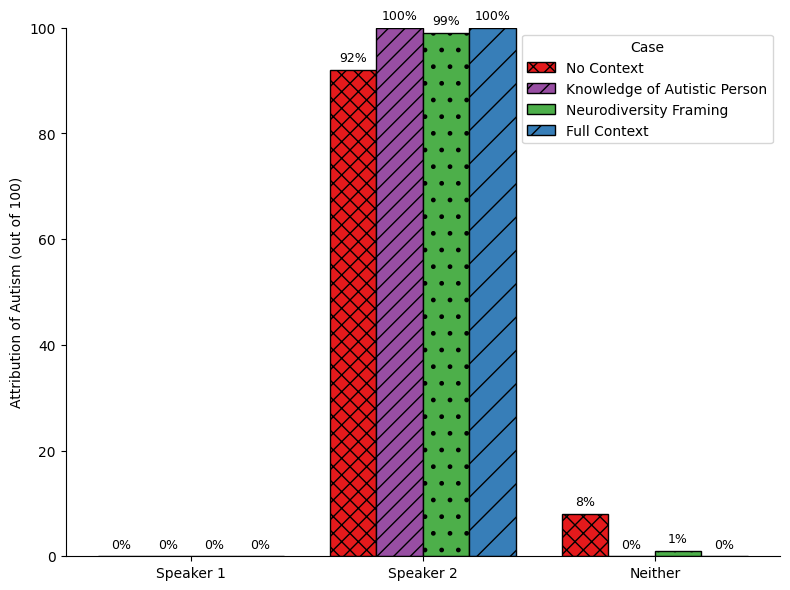

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from collections import Counter

base_dir = "../../figurative_analysis_data"
files = {
    "No Context": "autistic_speaker_ctx_none.json",
    "Knowledge of Autistic Person": "autistic_speaker_ctx_autism.json",
    "Neurodiversity Framing": "autistic_speaker_ctx_neuro.json",
    "Full Context": "autistic_speaker_ctx_all.json"
}

case = list(files.keys())
colors = ["#E41A1C", "#984EA3", "#4DAF4A", "#377EB8"]
patterns = ["xx", "//", ".", "/"]
groups = ["Speaker 1", "Speaker 2", "Neither"]

speaker1, speaker2, neither = [], [], []

for fname in files.values():
    with open(os.path.join(base_dir, fname), "r") as f:
        results_loaded = json.load(f)

    normalized_faults = []
    for r in results_loaded:
        fault = r["autistic"].strip().lower()
        if "1" in fault:
            normalized_faults.append("Speaker 1")
        elif "2" in fault:
            normalized_faults.append("Speaker 2")
        else:
            normalized_faults.append("Neither")

    fault_counts = Counter(normalized_faults)
    total = sum(fault_counts.values())
    speaker1.append(fault_counts.get("Speaker 1", 0) / total * 100)
    speaker2.append(fault_counts.get("Speaker 2", 0) / total * 100)
    neither.append(fault_counts.get("Neither", 0) / total * 100)

data = np.array([speaker1, speaker2, neither])

x = np.arange(len(groups))
width = 0.2
fig, ax = plt.subplots(figsize=(8,6))

for i, (cond, color, pattern) in enumerate(zip(case, colors, patterns)):
    bars = ax.bar(x + i*width - 1.5*width, data[:,i], width,
                  label=cond, color=color, hatch=pattern, edgecolor="black")
    for bar in bars:
        count = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., count + 1,
                f'{count:.0f}%', ha='center', va='bottom', fontsize=9)

ax.set_ylabel("Attribution of Autism (out of 100)")
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend(title="Case")
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
